# Pediatric Pneumonia Chest X-ray Machine Learning

<img src="https://prod-images-static.radiopaedia.org/images/25074603/4994014ef5c834e4803541aa1dc874_jumbo.jpeg" width="500"/>

## Context

Pediatric chest X-rays are harder to properly acquire and standardize when compared to adults, as for a children in a dark room, with people watching them from a glass window with strange machinery doesn't make for a comfortable experience.
At the same time, children present a different physiology that is important to be captured in X-ray classification algorithms, as most datasets tend to focus on adults only.

## Content

5,856 Chest X-rays labelled as either pneumonia or normal.


## Acknowledgements

All credits are due to the authors of the dataset:
Kermany D, Goldbaum M, Cai W et al. Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. Cell. 2018; 172(5):1122-1131. doi:10.1016/j.cell.2018.02.010


## Objectives

Build a machine learning model that can label pneumonia from normal chest X ray using `Tensorflow`





In [1]:
# doing the relevant imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import imread
from IPython.display import Image
import os

## Work directories

In [87]:
cur_dir=os.getcwd()
train_dir=cur_dir+"\\DATA\\Pneumonia\\Pediatric Chest X-ray Pneumonia\\train"
train_nmrl_dir=train_dir+"\\NORMAL\\"
train_pn_dir=train_dir+"\\PNEUMONIA\\"

In [88]:
test_dir=cur_dir+"\\DATA\\Pneumonia\\Pediatric Chest X-ray Pneumonia\\test"
test_nmrl_dir=test_dir+"\\NORMAL\\"
test_pn_dir=test_dir+"\\PNEUMONIA\\"

In [89]:
train_normal=os.listdir(train_nmrl_dir)
train_pn=os.listdir(train_pn_dir)

In [90]:
test_normal=os.listdir(test_nmrl_dir)
test_pn=os.listdir(test_pn_dir)

In [91]:
#Train paths
path_train_nrml=[train_nmrl_dir+image for image in train_normal]
path_train_pn=[train_pn_dir+image for image in train_pn]

# Test paths
path_test_nrml=[test_nmrl_dir+image for image in test_normal]
path_test_pn=[test_pn_dir+image for image in test_pn]

In [92]:
len(path_train_pn), len(path_train_nrml), len(path_train_pn)+len(path_train_nrml)

(3883, 1349, 5232)

In [93]:
len(path_test_pn), len(path_test_nrml), len(path_test_pn)+len(path_test_nrml)

(390, 234, 624)

In [84]:
path_train_nrml[0]

'C:\\Users\\saf167687\\Desktop\\Python_Learning\\Machine Learning Python\\98-Training\\DATA\\Pneumonia\\Pediatric Chest X-ray Pneumonia\\train\\NORMAL\\IM-0115-0001.jpeg'

## Data Visualization

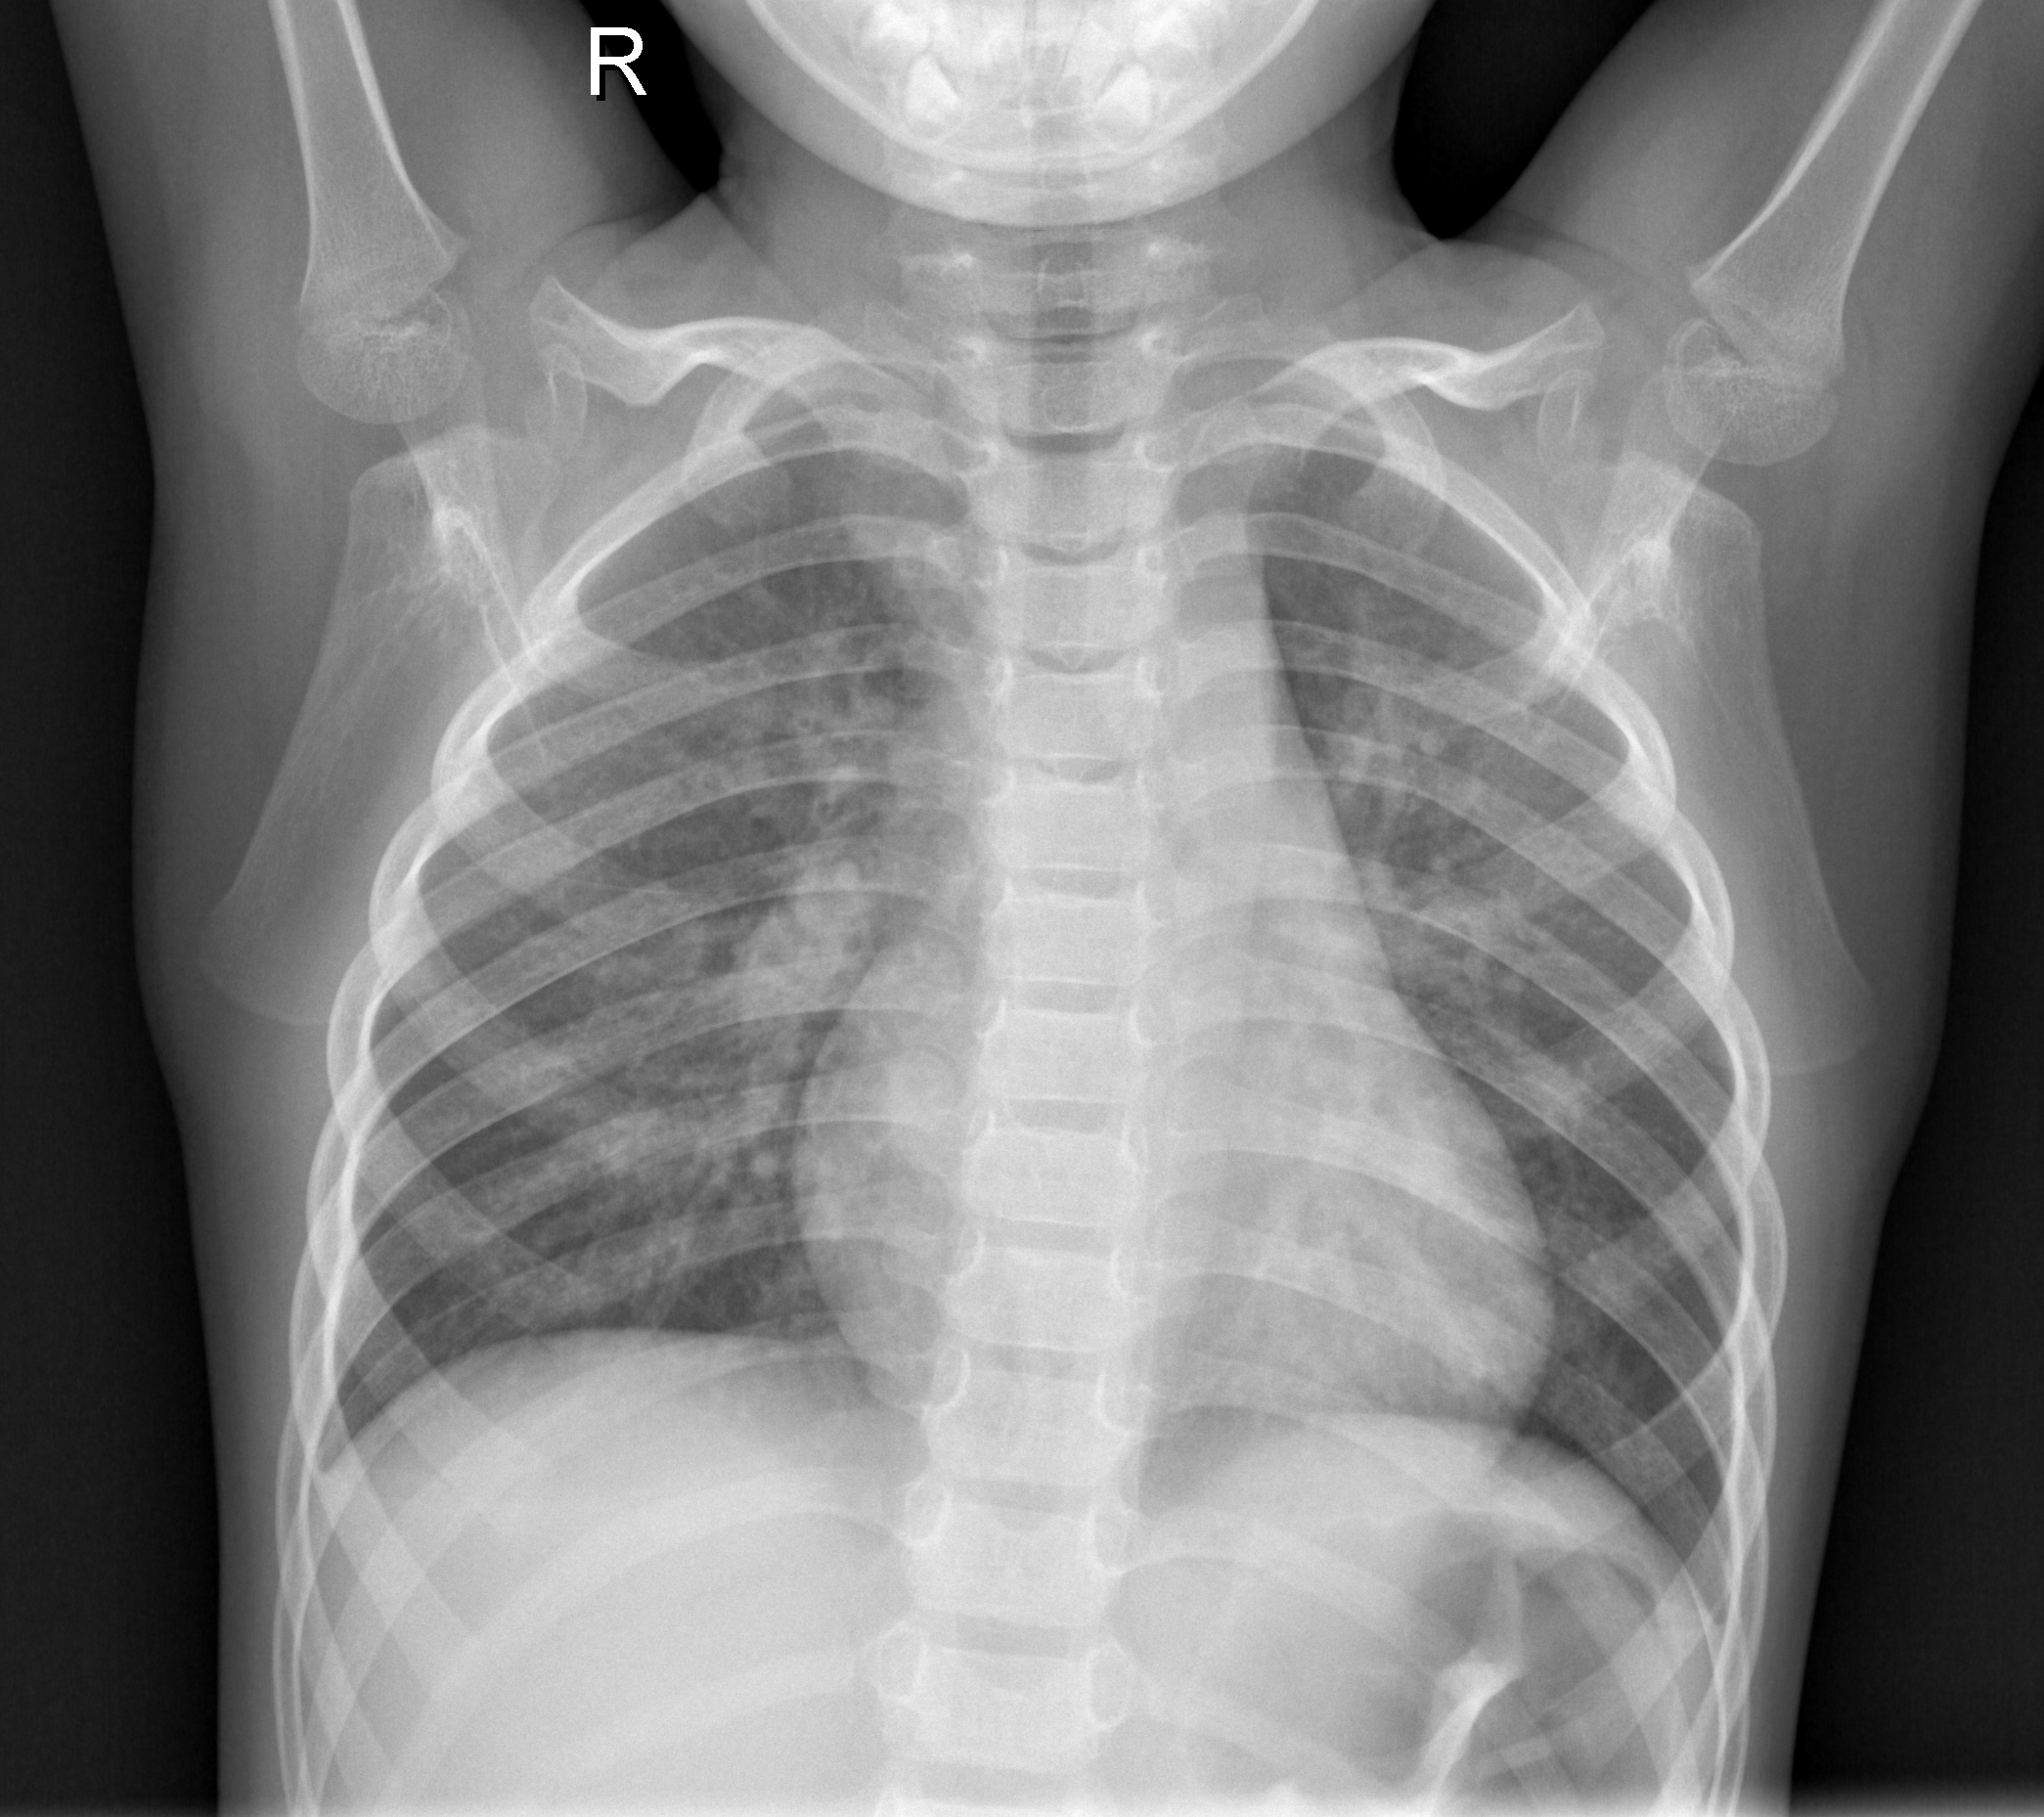

In [64]:
Image(path_train_nrml[0])

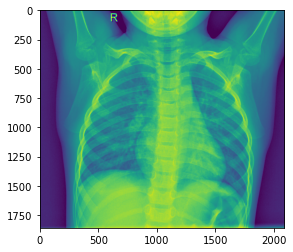

In [65]:
plt.imshow(imread(path_train_nrml[0]))

In [20]:
imread(path_train_nrml[0]).max(),imread(path_train_nrml[0]).min()

(255, 0)

## Preprocessing the data (images) for the model

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [156]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              
                              )

In [99]:
imread(path_train_nrml[56]).shape

(1654, 1678)

In [103]:
# determining shapes of our training images

x_shape=[imread(path).shape[0] for path in path_train_nrml]
y_shape=[imread(path).shape[1] for path in path_train_nrml]
mean_x_shape=np.array(x_shape).mean()
mean_y_shape=np.array(y_shape).mean()


AttributeError: 'list' object has no attribute 'mean'

In [110]:
mean_x_shape,mean_y_shape

(1380.3068939955522, 1666.6182357301705)

Text(0, 0.5, 'y shape of our training images')

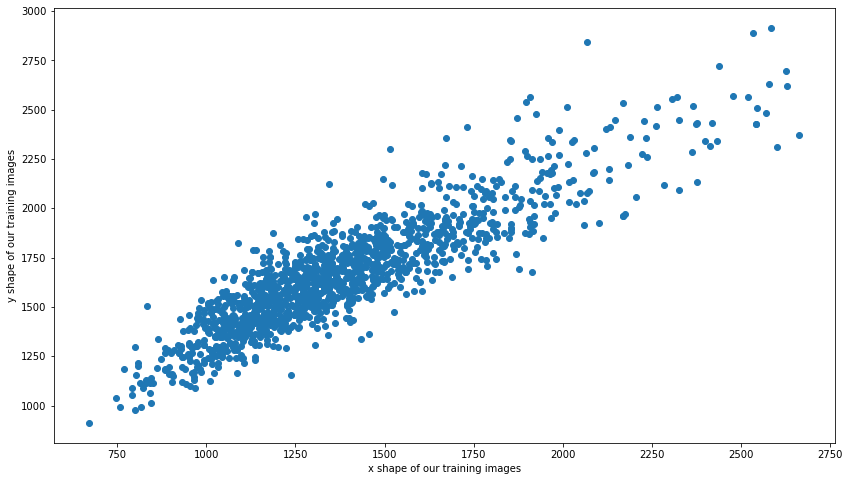

In [112]:
#visualziing with matplotlib the shape of our train images

plt.figure(figsize=(14,8))
plt.scatter(x_shape,y_shape)
plt.xlabel("x shape of our training images")
plt.ylabel("y shape of our training images")


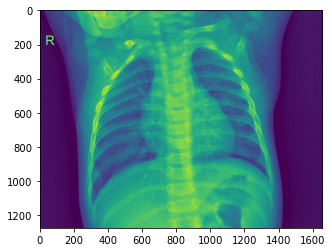

In [72]:
para_img=imread(path_train_nrml[55]).reshape(1275,1654,1)
plt.imshow(para_img)

In [160]:
image = tf.keras.preprocessing.image.load_img(path_train_nrml[55], color_mode="grayscale")
#image

In [161]:
para_img.shape

(1275, 1654, 1)

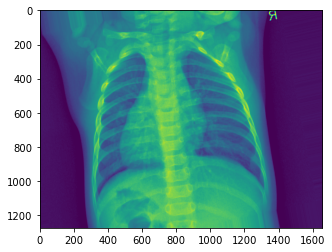

In [74]:
plt.imshow(image_gen.random_transform(para_img))

In [80]:
image_gen.flow_from_directory(train_dir)

Found 5232 images belonging to 2 classes.


In [94]:
image_gen.flow_from_directory(test_dir)

Found 624 images belonging to 2 classes.


In [141]:
#Target image shape
#image_shape=(1380,1670,1)
image_shape=(300,300,1)
#Batch_size
batch_size=16

In [184]:
train_image_gen=image_gen.flow_from_directory(train_dir,
                                             target_size=image_shape[:2],
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode="binary")

Found 5232 images belonging to 2 classes.


In [185]:
test_image_gen=image_gen.flow_from_directory(test_dir,
                                             target_size=image_shape[:2],
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode="binary")

Found 624 images belonging to 2 classes.


In [186]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [187]:
test=[]
for i,images in enumerate(train_image_gen):
    if i==2:
        test.append(images)
        break

In [228]:
liste=[]
for image,label in test_image_gen:
    if i==2:
        liste.append(label)
    break
    

In [232]:
liste

[array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.],
       dtype=float32)]

In [189]:
# test[0][0].shape

In [145]:
import warnings
warnings.filterwarnings("ignore")

## Create tensorflow Model

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [190]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])




In [191]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 298, 298, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 35, 35, 64)      

In [192]:
from tensorflow.keras.callbacks import EarlyStopping

In [193]:
early_stop=EarlyStopping(monitor="val_loss", patience=2)

In [194]:
# training the model

results=model.fit_generator(train_image_gen,epochs=20,
                           validation_data=test_image_gen,
                           callbacks=[early_stop])

Epoch 1/20
327/327 [==============================] - 739s 2s/step - loss: 0.3518 - accuracy: 0.8517 - val_loss: 0.6608 - val_accuracy: 0.6891
Epoch 2/20
327/327 [==============================] - 791s 2s/step - loss: 0.2598 - accuracy: 0.8918 - val_loss: 0.4989 - val_accuracy: 0.7676
Epoch 3/20
327/327 [==============================] - 823s 3s/step - loss: 0.2333 - accuracy: 0.9037 - val_loss: 0.4648 - val_accuracy: 0.8029
Epoch 4/20
327/327 [==============================] - 709s 2s/step - loss: 0.1998 - accuracy: 0.9249 - val_loss: 0.4543 - val_accuracy: 0.8237
Epoch 5/20
327/327 [==============================] - 742s 2s/step - loss: 0.1855 - accuracy: 0.9268 - val_loss: 0.7832 - val_accuracy: 0.7147
Epoch 6/20
327/327 [==============================] - 698s 2s/step - loss: 0.1753 - accuracy: 0.9312 - val_loss: 0.4587 - val_accuracy: 0.8349


## Evaluation of the model

In [195]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

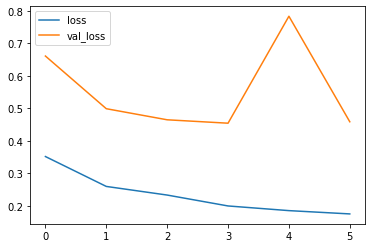

In [196]:
losses[['loss','val_loss']].plot()

In [197]:
model.metrics_names

['loss', 'accuracy']

In [198]:
from tensorflow.keras.preprocessing import image

In [215]:
preds_probabilities=model.predict_generator(test_image_gen)

In [216]:
preds_probabilities[:3]

array([[0.9999572 ],
       [0.99554515],
       [0.99430496]], dtype=float32)

In [203]:
test_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [205]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [217]:
predictions=preds_probabilities>0.5

In [222]:
preds_probabilities

array([[0.9999572 ],
       [0.99554515],
       [0.99430496],
       [0.9976853 ],
       [0.03309786],
       [0.99989164],
       [0.9997791 ],
       [0.6692153 ],
       [0.9999507 ],
       [0.5967141 ],
       [0.97234976],
       [0.9999255 ],
       [0.99956614],
       [0.924229  ],
       [0.0813624 ],
       [0.9998409 ],
       [0.9999985 ],
       [0.9616458 ],
       [0.973658  ],
       [0.9999968 ],
       [0.99997467],
       [0.07486275],
       [0.1932536 ],
       [0.9955706 ],
       [0.4004826 ],
       [0.9957489 ],
       [0.06748411],
       [0.9993806 ],
       [0.6101315 ],
       [0.99974275],
       [0.868442  ],
       [0.07340437],
       [0.9999937 ],
       [0.42552254],
       [0.9959607 ],
       [0.37732837],
       [0.31061548],
       [0.02571347],
       [0.03675878],
       [0.02497098],
       [0.98292375],
       [0.99990696],
       [0.9993502 ],
       [0.9798587 ],
       [0.9985418 ],
       [0.99865896],
       [0.9949264 ],
       [0.182

In [220]:
from sklearn.metrics import classification_report,confusion_matrix

In [221]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.37      0.26      0.30       234
           1       0.62      0.73      0.67       390

    accuracy                           0.55       624
   macro avg       0.49      0.50      0.49       624
weighted avg       0.53      0.55      0.53       624



In [223]:
confusion_matrix(test_image_gen.classes,predictions)

array([[ 61, 173],
       [105, 285]], dtype=int64)

## Save the model

In [224]:
model.save("pneumonia_predictor.h5")